In [1]:
import numpy as np              # Одномерные и многомерные массивы (array)
import pandas as pd             # Таблицы и временные ряды (dataframe, series)
import matplotlib.pyplot as plt # Научная графика
import seaborn as sns           # Еще больше красивой графики для визуализации данных
import sklearn                  # Алгоритмы машинного обучения

## Классификация жанров песен по аудиоданным

### 1. Загрузка данных

In [2]:
import pandas as pd

tracks = pd.read_csv("songs.csv")
echonest_metrics = pd.read_json("echonest-metrics.json", precise_float = True)

In [3]:
# Объединим соответствующие столбцы tracks и echonest_metrics
echo_tracks = echonest_metrics.merge(tracks[['genre_top', 'track_id']], on = 'track_id')

Таблица содержит данные о более 4 тысяч песен. Для каждой песни указаны id соответствующего трека, насколько акустической является песня, танцевальность, энергичность, инструментальность, записана ли она с живой аудиторией, речевость, скорость исполнения, валентность,топ жанра.

Вначале посмотрим на размеры таблицы: количество строк (каждая строка соответствует одной песне) и количество столбцов (каждый столбец соответствует конкретному признаку):

In [4]:
echo_tracks.shape

(4802, 10)

In [5]:
echo_tracks

track_id  acousticness  danceability    energy  instrumentalness  \
0            2      0.416675      0.675894  0.634476      1.062807e-02   
1            3      0.374408      0.528643  0.817461      1.851103e-03   
2            5      0.043567      0.745566  0.701470      6.967990e-04   
3          134      0.452217      0.513238  0.560410      1.944269e-02   
4          153      0.988306      0.255661  0.979774      9.730057e-01   
...        ...           ...           ...       ...               ...   
4797    124718      0.412194      0.686825  0.849309      6.000000e-10   
4798    124719      0.054973      0.617535  0.728567      7.215700e-06   
4799    124720      0.010478      0.652483  0.657498      7.098000e-07   
4800    124721      0.067906      0.432421  0.764508      1.625500e-06   
4801    124722      0.153518      0.638660  0.762567      5.000000e-10   

      liveness  speechiness    tempo   valence genre_top  
0     0.177647     0.159310  165.922  0.576661   Hip-Hop  
1     0.105880     0.461818  126.957  0.269240   Hip-Hop  
2     0.373143     0.124595  100.260  0.621661   Hip-Hop  
3     0.096567     0.525519  114.290  0.894072   Hip-Hop  
4     0.121342     0.051740   90.241  0.034018      Rock  
...        ...          ...      ...       ...       ...  
4797  0.867543     0.367315   96.104  0.692414   Hip-Hop  
4798  0.131438     0.243130   96.262  0.399720   Hip-Hop  
4799  0.701523     0.229174   94.885  0.432240   Hip-Hop  
4800  0.104412     0.310553  171.329  0.580087   Hip-Hop  
4801  0.264847     0.303372   77.842  0.656612   Hip-Hop  

[4802 rows x 10 columns]

### 2. Описание задачи

За последние несколько лет стриминговые сервисы с огромными каталогами стали основным средством, с помощью которого большинство людей слушают любимую музыку. Но в то же время огромное количество предлагаемой музыки может означать, что пользователи могут быть немного ошеломлены, пытаясь найти новую музыку, которая соответствует их вкусам.

По этой причине потоковые сервисы изучили способы категоризации музыки, чтобы можно было давать персональные рекомендации. Один метод включает в себя прямой анализ необработанной аудиоинформации в данной песне, оценивая необработанные данные по различным показателям. Мы будем изучать данные, собранные исследовательской группой, известной как The Echo Nest. Наша цель — просмотреть этот набор данных и классифицировать песни как «хип-хоп» или «рок», не слушая ни одной из них самостоятельно. 

Для начала давайте загрузим метаданные о наших треках вместе с метриками треков, собранными по ссылке на наборе данных Echo Nest echonest json . Песня — это нечто большее, чем ее название, исполнитель и количество прослушиваний. У нас есть еще один набор данных с музыкальными характеристиками каждого трека, такими как танцевальность и акустика по шкале от 0 до 1. Они существуют в двух разных файлах в разных форматах — CSV и JSON. Хотя CSV является популярным форматом файлов для обозначения табличных данных, JSON — еще один распространенный формат файлов, в котором базы данных часто возвращают результаты заданного запроса.

Метод echo_tracks.head() отображает первые строки (по умолчанию, 5 строк) таблицы

In [6]:
echo_tracks.head(15)

track_id  acousticness  danceability    energy  instrumentalness  \
0          2      0.416675      0.675894  0.634476          0.010628   
1          3      0.374408      0.528643  0.817461          0.001851   
2          5      0.043567      0.745566  0.701470          0.000697   
3        134      0.452217      0.513238  0.560410          0.019443   
4        153      0.988306      0.255661  0.979774          0.973006   
5        154      0.970135      0.352946  0.023852          0.957113   
6        155      0.981657      0.142249  0.912122          0.967294   
7        169      0.989141      0.225978  0.722835          0.263076   
8        170      0.886660      0.298518  0.744333          0.920950   
9        171      0.698278      0.285816  0.213494          0.955691   
10       172      0.815549      0.144125  0.892721          0.900430   
11       173      0.842113      0.285293  0.564689          0.951624   
12       174      0.367393      0.339698  0.846639          0.909186   
13       175      0.993928      0.310090  0.952493          0.274311   
14       176      0.833516      0.206509  0.779140          0.940841   

    liveness  speechiness    tempo   valence genre_top  
0   0.177647     0.159310  165.922  0.576661   Hip-Hop  
1   0.105880     0.461818  126.957  0.269240   Hip-Hop  
2   0.373143     0.124595  100.260  0.621661   Hip-Hop  
3   0.096567     0.525519  114.290  0.894072   Hip-Hop  
4   0.121342     0.051740   90.241  0.034018      Rock  
5   0.113261     0.032177   53.758  0.035632      Rock  
6   0.363510     0.087527   91.912  0.034325      Rock  
7   0.092371     0.053406   94.322  0.028347      Rock  
8   0.139587     0.088781   97.880  0.073548      Rock  
9   0.087036     0.064094  125.645  0.150599      Rock  
10  0.104703     0.102294  138.680  0.034916      Rock  
11  0.110481     0.040611  166.552  0.254299      Rock  
12  0.198944     0.462607   70.887  0.048243      Rock  
13  0.354231     0.825744   69.413  0.033402      Rock  
14  0.372311     0.077227  123.583  0.028144      Rock

А вот последние строки:

In [7]:
echo_tracks.tail()

track_id  acousticness  danceability    energy  instrumentalness  \
4797    124718      0.412194      0.686825  0.849309      6.000000e-10   
4798    124719      0.054973      0.617535  0.728567      7.215700e-06   
4799    124720      0.010478      0.652483  0.657498      7.098000e-07   
4800    124721      0.067906      0.432421  0.764508      1.625500e-06   
4801    124722      0.153518      0.638660  0.762567      5.000000e-10   

      liveness  speechiness    tempo   valence genre_top  
4797  0.867543     0.367315   96.104  0.692414   Hip-Hop  
4798  0.131438     0.243130   96.262  0.399720   Hip-Hop  
4799  0.701523     0.229174   94.885  0.432240   Hip-Hop  
4800  0.104412     0.310553  171.329  0.580087   Hip-Hop  
4801  0.264847     0.303372   77.842  0.656612   Hip-Hop

In [8]:
echo_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4802 entries, 0 to 4801
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          4802 non-null   int64  
 1   acousticness      4802 non-null   float64
 2   danceability      4802 non-null   float64
 3   energy            4802 non-null   float64
 4   instrumentalness  4802 non-null   float64
 5   liveness          4802 non-null   float64
 6   speechiness       4802 non-null   float64
 7   tempo             4802 non-null   float64
 8   valence           4802 non-null   float64
 9   genre_top         4802 non-null   object 
dtypes: float64(8), int64(1), object(1)
memory usage: 412.7+ KB


Мы видим, что столбцы (признаки) имеют имена.

Опишем признаки:  
  
* track_id	- id соответствующего трека
* acousticness - это значение описывает, насколько акустической является песня. Оценка 1.0 означает, что песня, скорее всего, будет акустической
* danceability - танцевальность описывает, насколько трек подходит для танцев, основываясь на сочетании музыкальных элементов, включая темп, стабильность ритма, силу удара и общую регулярность. Значение 0,0 наименее танцевально, а 1,0 наиболее танцевально
* energy - (энергия) представляет собой воспринимаемую меру интенсивности и активности. Как правило, энергичные треки кажутся быстрыми, громкими и шумными
* instrumentalness - это значение представляет количество вокала в песне. Чем он ближе к 1.0, тем инструментальнее песня
* liveness - это значение описывает вероятность того, что песня была записана с живой аудиторией. Согласно официальной документации, « значение выше 0,8 дает высокую вероятность того, что трек активен»
* speechiness - речевость определяет наличие произнесенных слов в дорожке. Если речь песни выше 0,66, она, вероятно, состоит из произнесенных слов, оценка от 0,33 до 0,66 — это песня, которая может содержать как музыку, так и слова, а оценка ниже 0,33 означает, что в песне нет речи
* tempo - мера времени в музыке, упрощённо — «скорость исполнения музыки»
* valence - показатель от 0,0 до 1,0, описывающий музыкальную позитивность, передаваемую треком. Треки с высокой валентностью звучат более позитивно (например, счастливые, веселые, эйфорические), а треки с низкой валентностью звучат более негативно (например, грустные, подавленные, злые)
* genre_top - топ жанра («хип-хоп» или «рок»)

Целевой признак genre_top - номинальный (категориальный), остальные признаки - количественные (числовые).

Требуется классифицировать песни как «хип-хоп» или «рок» (genre_top). Это задача классификации.

Столбец 'genre_top' содержит категориальные значения. Пока он имеет тип 'Object'. Заменим тип на специальный, предназначенный для хранения категориальных значений:

In [44]:
echo_tracks['genre_top'] = echo_tracks['genre_top'].astype('category')

In [45]:
echo_tracks['genre_top'].dtype

CategoricalDtype(categories=['Hip-Hop', 'Rock'], ordered=False)

Информация о числовых признаках:

In [11]:
echo_tracks.describe()

track_id  acousticness  danceability       energy  \
count    4802.000000  4.802000e+03   4802.000000  4802.000000   
mean    30164.871720  4.870600e-01      0.436556     0.625126   
std     28592.013796  3.681396e-01      0.183502     0.244051   
min         2.000000  9.491000e-07      0.051307     0.000279   
25%      7494.250000  8.351236e-02      0.296047     0.450757   
50%     20723.500000  5.156888e-01      0.419447     0.648374   
75%     44240.750000  8.555765e-01      0.565339     0.837016   
max    124722.000000  9.957965e-01      0.961871     0.999768   

       instrumentalness     liveness  speechiness        tempo      valence  
count       4802.000000  4802.000000  4802.000000  4802.000000  4802.000000  
mean           0.604096     0.187997     0.104877   126.687944     0.453413  
std            0.376487     0.150562     0.145934    34.002473     0.266632  
min            0.000000     0.025297     0.023234    29.093000     0.014392  
25%            0.164972     0.104052     0.036897    98.000750     0.224617  
50%            0.808752     0.123080     0.049594   124.625500     0.446240  
75%            0.915472     0.215151     0.088290   151.450000     0.666914  
max            0.993134     0.971392     0.966177   250.059000     0.983649

Информация о категориальных признаках:

In [12]:
echo_tracks.describe(include = ['category'])

genre_top
count       4802
unique         2
top         Rock
freq        3892

Имена столбцов (признаков) можно получить таким образом:

In [13]:
echo_tracks.columns

Index(['track_id', 'acousticness', 'danceability', 'energy',
       'instrumentalness', 'liveness', 'speechiness', 'tempo', 'valence',
       'genre_top'],
      dtype='object')

Имена строк (совпадают с номерами):

In [14]:
echo_tracks.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            4792, 4793, 4794, 4795, 4796, 4797, 4798, 4799, 4800, 4801],
           dtype='int64', length=4802)

### 3. Разбиение данных на обучающую и тестовую выборки

Для классификации песен будем использовать все входные признаки, кроме 'track_id'.

In [46]:
X = echo_tracks.drop(['genre_top', 'track_id'], axis = 1)
y = echo_tracks['genre_top']

Разобьем данные на обучающую и тестовую выборки в пропорции 3:1 (75% - обучающая выборка, 25% - тестовая):

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

N_train, N_test

(3601, 1201)

### 4. Визуализация данных из обучающей выборки

Посмотрим, как жанр песни зависит от её речевости. Построим диаграмму рассеивания для двух признаков: genre_top и speechiness.

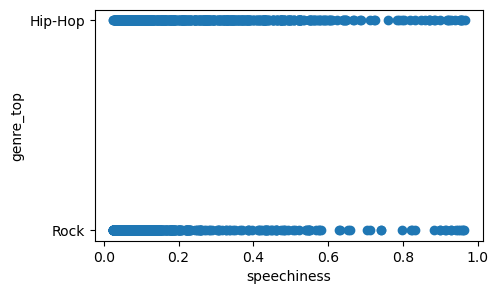

In [17]:
plt.figure(figsize = (5, 3))
plt.scatter(X_train['speechiness'], y_train)
plt.xlabel('speechiness')
plt.ylabel('genre_top')
pass

Все диаграммы рассеивания:

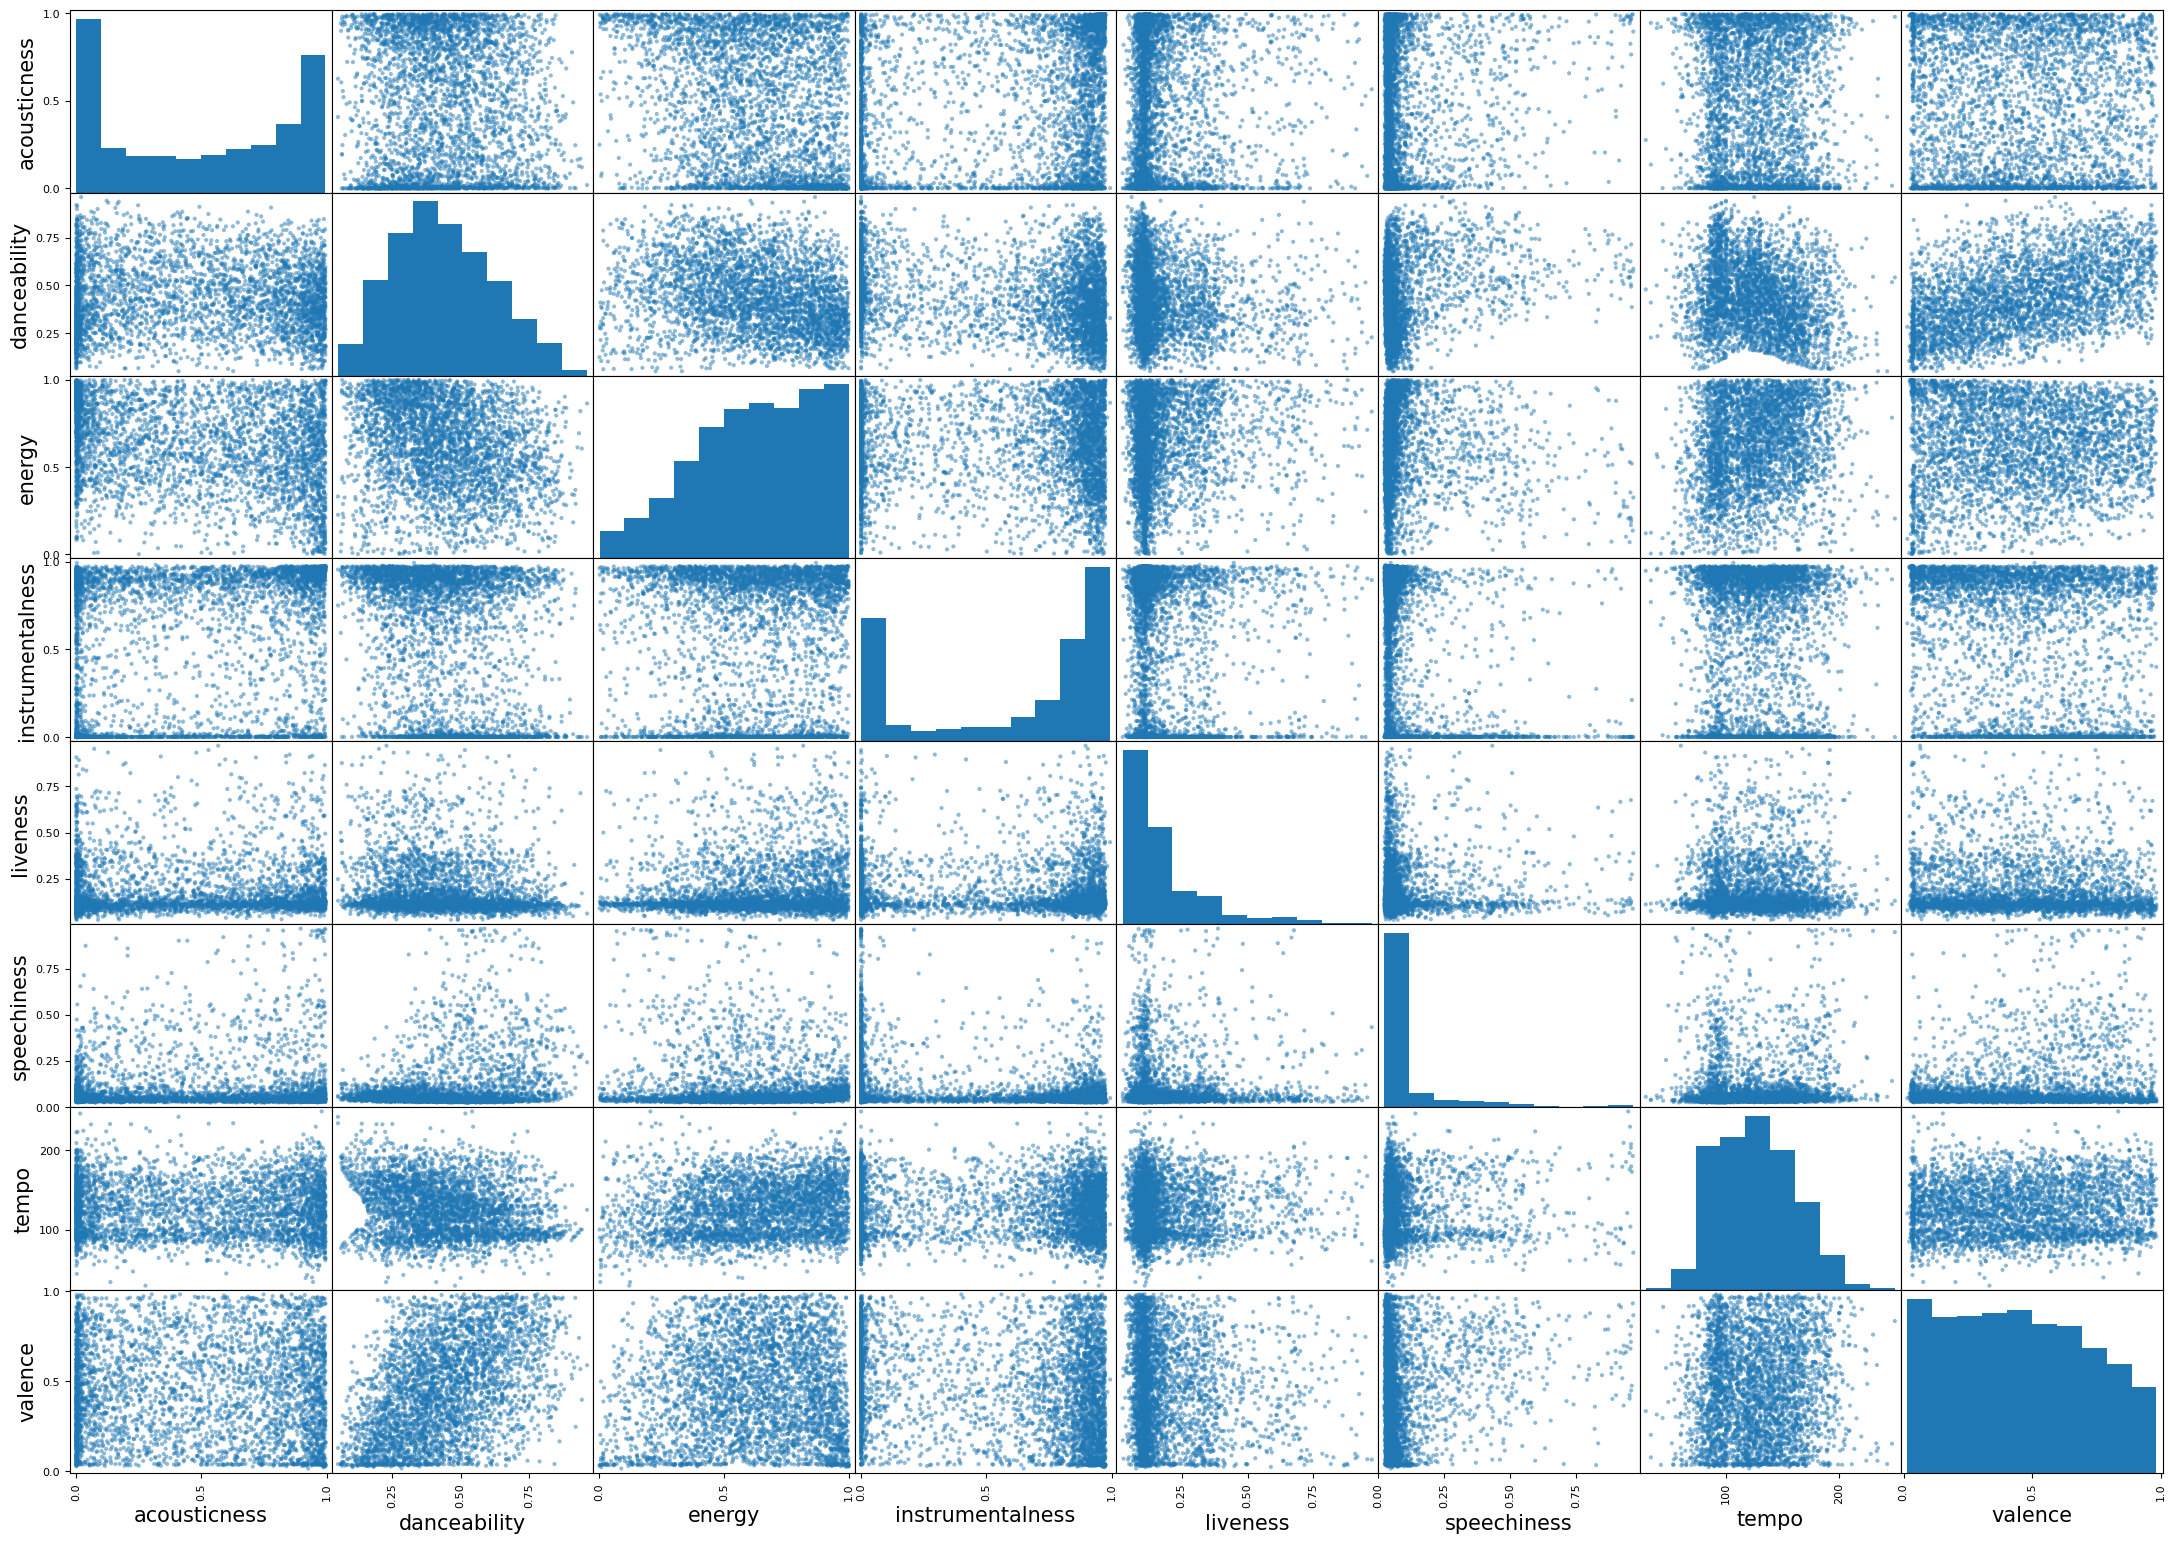

In [18]:
plt.rc('font', size = 15) 
pd.plotting.scatter_matrix(X_train, figsize = (27, 19))
pass

Можно вычислить матрицу корреляции для количественных признаков:

In [19]:
corr_mat = X_train.corr()
corr_mat

acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000     -0.029926 -0.286949          0.193432   
danceability         -0.029926      1.000000 -0.243731         -0.240696   
energy               -0.286949     -0.243731  1.000000          0.027998   
instrumentalness      0.193432     -0.240696  0.027998          1.000000   
liveness             -0.033135     -0.122964  0.121018         -0.098514   
speechiness           0.068189      0.272745 -0.099582         -0.353614   
tempo                -0.025460     -0.220632  0.184673          0.021897   
valence              -0.006308      0.469410  0.033078         -0.207734   

                  liveness  speechiness     tempo   valence  
acousticness     -0.033135     0.068189 -0.025460 -0.006308  
danceability     -0.122964     0.272745 -0.220632  0.469410  
energy            0.121018    -0.099582  0.184673  0.033078  
instrumentalness -0.098514    -0.353614  0.021897 -0.207734  
liveness          1.000000     0.041187  0.012154 -0.048321  
speechiness       0.041187     1.000000  0.014045  0.148794  
tempo             0.012154     0.014045  1.000000  0.055308  
valence          -0.048321     0.148794  0.055308  1.000000

Удобно использовать визуальный образ этой матрицы. Чем темнее ячейка, тем больше по абсолютной величине коэффициент корреляции:

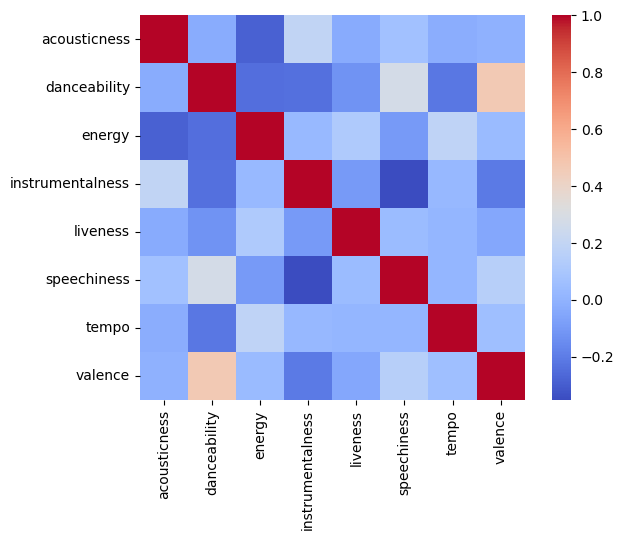

In [20]:
plt.figure(figsize = (7, 5))
plt.rc('font', size = 10) 
sns.heatmap(corr_mat, square = True, cmap = 'coolwarm')
pass

Также её можно интерпретировать следующим образом:

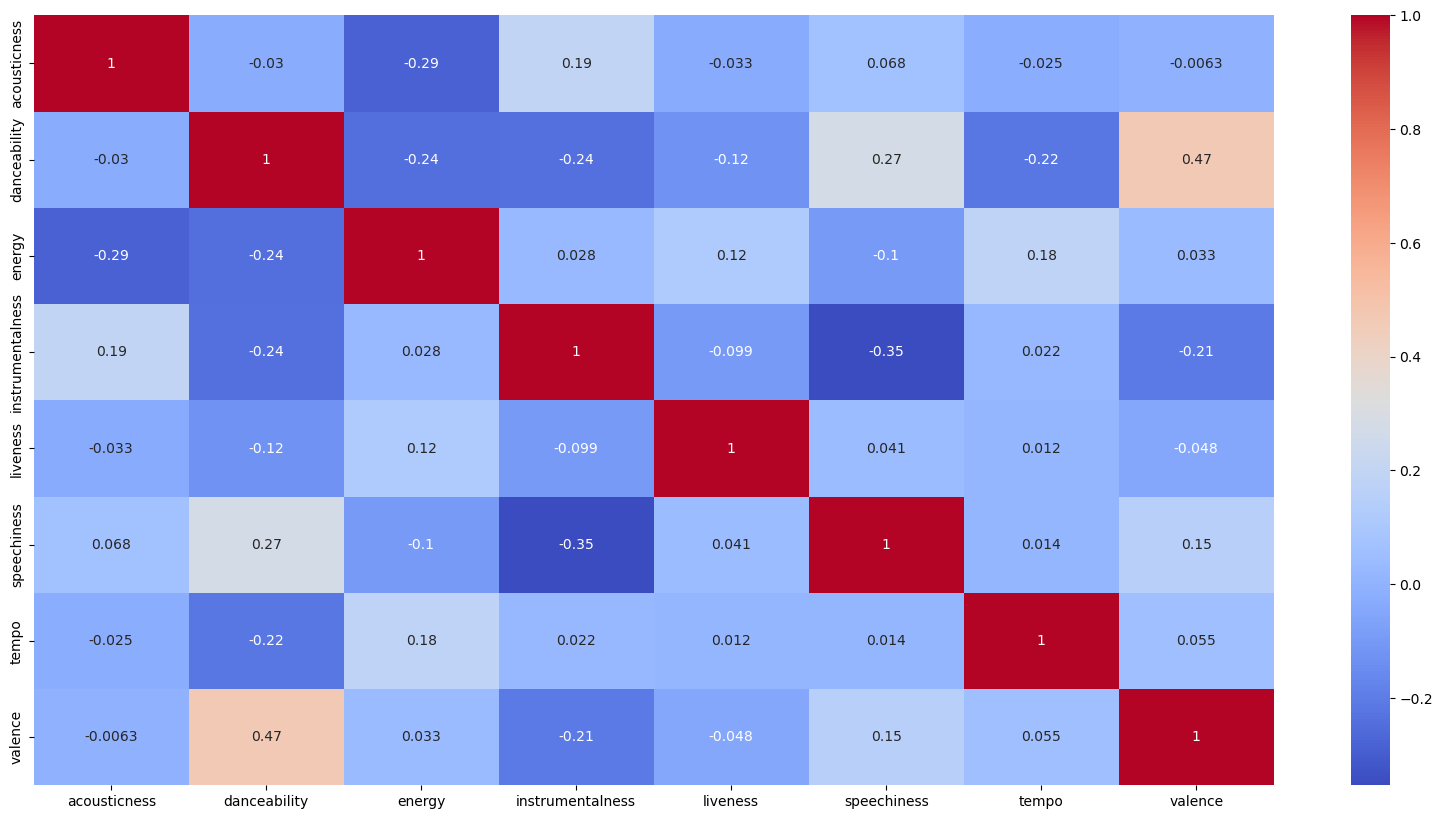

In [21]:
plt.figure(figsize = (20, 10))
data_corr = X_train.corr()
sns.heatmap(data_corr, annot = True, cmap = 'coolwarm')
pass

Выведем таблицу, которая даст нам понять, какие коэффициенты корреляции больше значения 0.5:

In [22]:
corr_mat > 0.5

acousticness  danceability  energy  instrumentalness  \
acousticness              True         False   False             False   
danceability             False          True   False             False   
energy                   False         False    True             False   
instrumentalness         False         False   False              True   
liveness                 False         False   False             False   
speechiness              False         False   False             False   
tempo                    False         False   False             False   
valence                  False         False   False             False   

                  liveness  speechiness  tempo  valence  
acousticness         False        False  False    False  
danceability         False        False  False    False  
energy               False        False  False    False  
instrumentalness     False        False  False    False  
liveness              True        False  False    False  
speechiness          False         True  False    False  
tempo                False        False   True    False  
valence              False        False  False     True

Интересно посмотреть, сколько раз переменные принимают то или иное значение

In [23]:
y_train.value_counts()

Rock       2916
Hip-Hop     685
Name: genre_top, dtype: int64

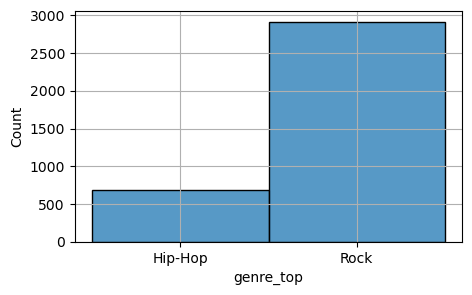

In [25]:
plt.figure(figsize = (5, 3))
sns.histplot(y_train)
plt.grid()
pass

Видим, что песней жанра "Рок" больше песней жанра "Хип-Хоп".

In [26]:
X_train['danceability'].value_counts()

0.233306    1
0.380212    1
0.403832    1
0.603841    1
0.556005    1
           ..
0.679886    1
0.414803    1
0.279794    1
0.245404    1
0.370887    1
Name: danceability, Length: 3601, dtype: int64

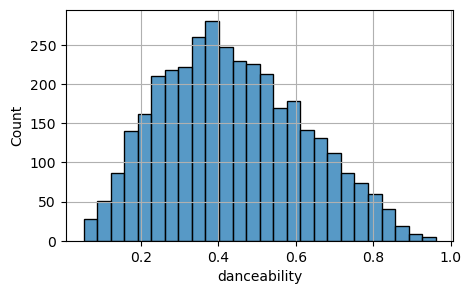

In [27]:
plt.figure(figsize = (5, 3))
sns.histplot(X_train['danceability'])
plt.grid()
pass

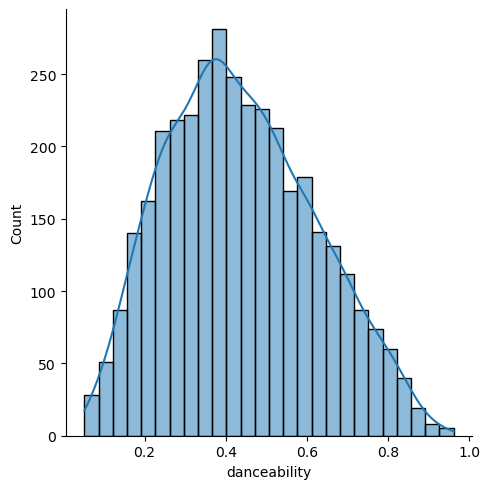

In [28]:
sns.displot(X_train['danceability'], kde = True)
pass

In [29]:
X_train['speechiness'].value_counts()

0.043880    1
0.029549    1
0.030431    1
0.043328    1
0.029305    1
           ..
0.039397    1
0.472313    1
0.047966    1
0.060425    1
0.087242    1
Name: speechiness, Length: 3601, dtype: int64

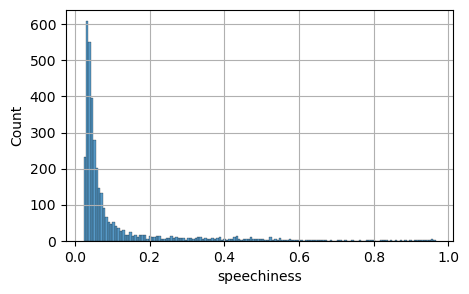

In [30]:
plt.figure(figsize = (5, 3))
sns.histplot(X_train['speechiness'])
plt.grid()
pass

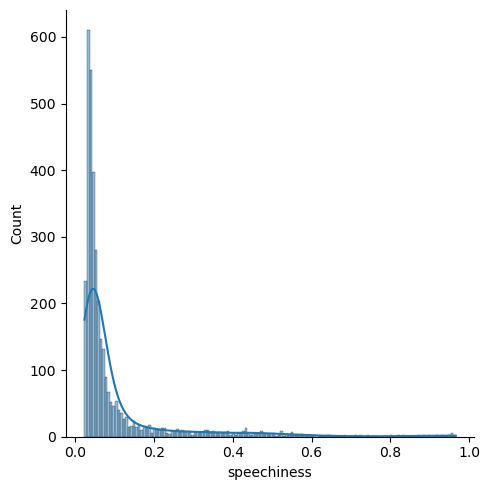

In [31]:
sns.displot(X_train['speechiness'], kde = True)
pass

Видим, что песен, где количество слов не так много, больше. Это объяснимо, так как в песнях жанра "Рок" слов не так много, как в песнях жанра "Хип-Хоп". Выше показано, что песен жанра "Рок" намного больше.  

Можно представить вместе и диаграмму рассеивания для пары признаков и соответствующие гистограммы:

In [32]:
X_curr = X_train
X_curr[y_train.name] = y_train 

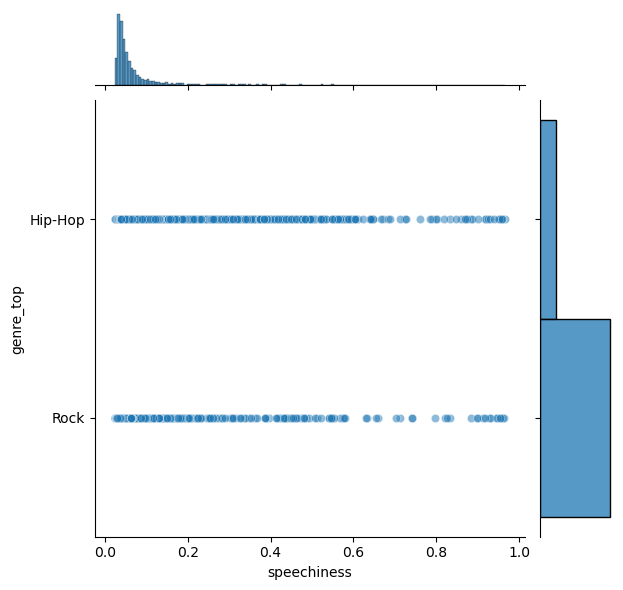

In [33]:
sns.jointplot(x = 'speechiness', y = 'genre_top', alpha = 0.5, data = X_curr)
pass

Ящик с усами (бокс-диаграмма) - это один из возможных способов визуального представления распределения. Нижний и верхний концы ящика соответствуют 1-му и 3-му квартилям (25% и 75% квантилям соответственно), а горизонтальная линия внутри ящика - медиане. Верхний ус продолжается вверх вплоть до максимального значения, но не выше 1.5 межквартильного расстояния от верхней кромки ящика. Аналогично нижний ус - продолжается вниз до минимального значения, но не ниже 1.5 межквартильных расстояний от нижней кромки ящика. На концах усов ставятся небольшие зарубки. За пределами усов значения изображаются в виде отдельных точек - эти значения можно считать выбросами.

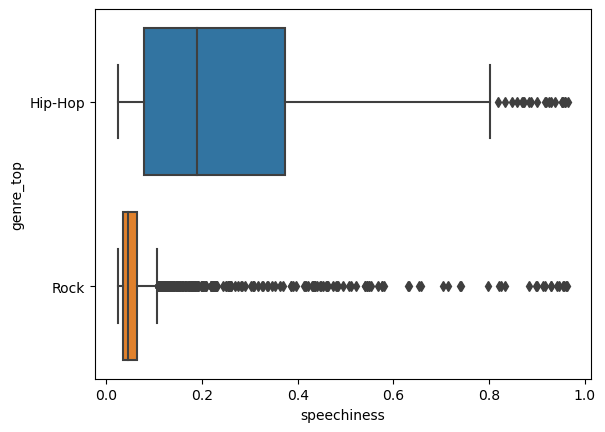

In [34]:
sns.boxplot(x = 'speechiness', y = 'genre_top', data = X_curr)
pass

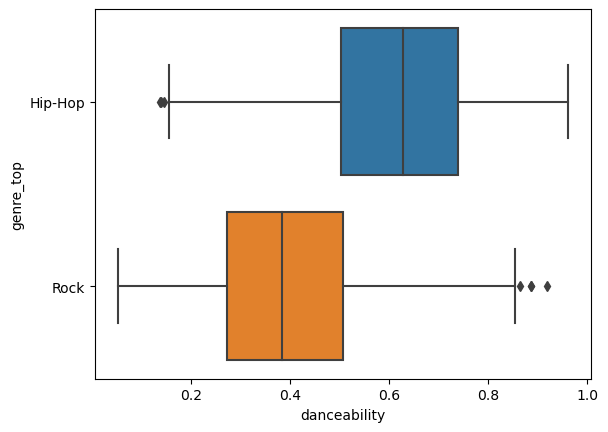

In [35]:
sns.boxplot(x = 'danceability', y = 'genre_top', data = X_curr)
pass

Также информацию о характере распределения можно получить из скрипичных графиков (violin plots). В этом случае изображают графики аппроксимации плотности вероятности.

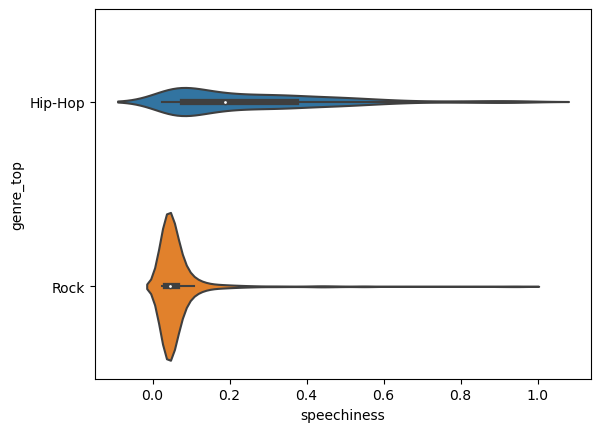

In [36]:
sns.violinplot(x = 'speechiness', y = 'genre_top', data = X_curr)
pass

### 5. Обработка пропущенных значений

Пропущенные значения в таблице представлены значениями np.nan. Посмотрим, сколько пропущенных значений в каждом столбце матрицы: na - not available

In [37]:
X_train.isna().sum()  

acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
genre_top           0
dtype: int64

In [38]:
X_test.isna().sum()  

acousticness        0
danceability        0
energy              0
instrumentalness    0
liveness            0
speechiness         0
tempo               0
valence             0
dtype: int64

In [39]:
y_train.isna().sum()

0

In [40]:
y_test.isna().sum()

0

Пропущенных значений нет.

### 6.  Обработка коррелированных признаков

Корреляция между признаками нежелательна. Фактически, сильная корреляция между признаками означает избыточность переменных, отсутствие дополнительных значений для проблемы и может привести к переобучению и неоправданному замедлению процесса.  
Проверим корреляцию между признаками и отбросим избыточные признаки.

In [41]:
corr_mat = X_train.corr()
corr_mat

acousticness  danceability    energy  instrumentalness  \
acousticness          1.000000     -0.029926 -0.286949          0.193432   
danceability         -0.029926      1.000000 -0.243731         -0.240696   
energy               -0.286949     -0.243731  1.000000          0.027998   
instrumentalness      0.193432     -0.240696  0.027998          1.000000   
liveness             -0.033135     -0.122964  0.121018         -0.098514   
speechiness           0.068189      0.272745 -0.099582         -0.353614   
tempo                -0.025460     -0.220632  0.184673          0.021897   
valence              -0.006308      0.469410  0.033078         -0.207734   

                  liveness  speechiness     tempo   valence  
acousticness     -0.033135     0.068189 -0.025460 -0.006308  
danceability     -0.122964     0.272745 -0.220632  0.469410  
energy            0.121018    -0.099582  0.184673  0.033078  
instrumentalness -0.098514    -0.353614  0.021897 -0.207734  
liveness          1.000000     0.041187  0.012154 -0.048321  
speechiness       0.041187     1.000000  0.014045  0.148794  
tempo             0.012154     0.014045  1.000000  0.055308  
valence          -0.048321     0.148794  0.055308  1.000000

In [42]:
corr_mat.where(np.triu(corr_mat > 0.5, k = 1)).stack().sort_values(ascending = False)

Series([], dtype: float64)

Зависимости между признаками песен не наблюдается.

### 7.  Масштабирование

Перед применением алгоритмов машинного обучения количественные признаки полезно нормализовать.  

Наиболее часто используют один из трех следующих способов:  
  
* приведение к отрезку [0, 1] - это линейное преобразование, приводящее все значения к заданному отрезку;
* стандартизация - линейное преобразование, приводящее все значения к нулевому среднему и единичному стандартному отклонению;
* нормализация - приведение данных к единичной норме.

Выполним стандартизацию всех признаков:

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns, index = X_train.index)

In [49]:
X_train.describe()

acousticness  danceability        energy  instrumentalness  \
count  3.601000e+03  3.601000e+03  3.601000e+03      3.601000e+03   
mean   8.560217e-17  1.395564e-16 -4.650851e-16      1.904737e-16   
std    1.000139e+00  1.000139e+00  1.000139e+00      1.000139e+00   
min   -1.323238e+00 -2.110739e+00 -2.561600e+00     -1.605962e+00   
25%   -1.098021e+00 -7.668339e-01 -7.144527e-01     -1.179483e+00   
50%    5.539069e-02 -8.556202e-02  1.016389e-01      5.462079e-01   
75%    1.002463e+00  7.032408e-01  8.588876e-01      8.211272e-01   
max    1.384619e+00  2.868884e+00  1.540301e+00      1.030855e+00   

           liveness   speechiness         tempo       valence  
count  3.601000e+03  3.601000e+03  3.601000e+03  3.601000e+03  
mean   1.847546e-17  8.156332e-17 -1.509022e-16  8.214910e-17  
std    1.000139e+00  1.000139e+00  1.000139e+00  1.000139e+00  
min   -1.077861e+00 -5.580957e-01 -2.870922e+00 -1.640597e+00  
25%   -5.619364e-01 -4.646889e-01 -8.459840e-01 -8.494189e-01  
50%   -4.341422e-01 -3.782326e-01 -5.903031e-02 -3.725494e-02  
75%    1.880987e-01 -1.218707e-01  7.275992e-01  8.047025e-01  
max    5.183685e+00  5.931998e+00  3.620385e+00  1.977945e+00

### 8. Обучение модели

In [50]:
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier

### 8.1. Классификатор ближайших соседей

In [51]:
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv = 5)
grid.fit(X_train, y_train)

grid.best_score_, grid.best_params_

(0.9075277392510402, {'n_neighbors': 10})

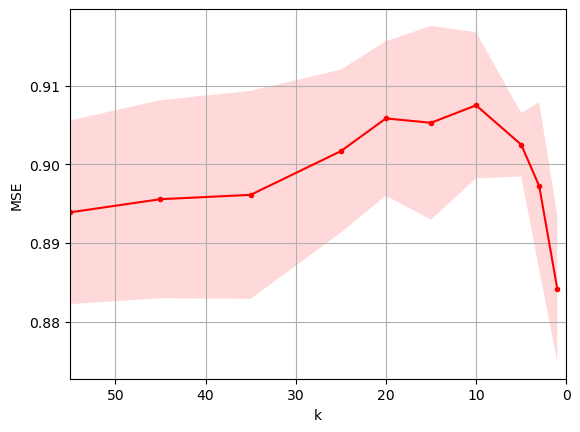

In [52]:
MSE_arr = grid.cv_results_['mean_test_score']
std_arr = grid.cv_results_['std_test_score']
plt.plot(nnb, MSE_arr, 'r.-')
plt.fill_between(nnb, MSE_arr - std_arr, MSE_arr + std_arr, alpha = 0.15, facecolor = 'red')
plt.xlim([max(nnb), 0])
plt.grid()
plt.xlabel('k')
plt.ylabel('MSE')
pass

Мы сделали некие преобразований с X_train. Чтобы нашу модель опробовать на X_test, надо вначале с X_test выполнить те же преобразования.

In [53]:
# Масштабирование:
X_test = pd.DataFrame(scaler.transform(X_test), 
                      columns = X_test.columns, index = X_test.index)

Напишем функцию для вычисления метрик.

In [54]:
def get_metrics(classifer):
    model = classifer
    model.fit(X_train, y_train)

    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    print("balanced_accuracy_score Train: ", metrics.balanced_accuracy_score(y_train, y_train_pred))
    print("balanced_accuracy_score Test: ", metrics.balanced_accuracy_score(y_test, y_test_pred))
    print("cohen_kappa_score Train: ", metrics.cohen_kappa_score(y_train, y_train_pred))
    print("cohen_kappa_score Test: ", metrics.cohen_kappa_score(y_test, y_test_pred))
    print("matthews_corrcoef Train: ", metrics.matthews_corrcoef(y_train, y_train_pred))
    print("matthews_corrcoef Test: ", metrics.matthews_corrcoef(y_test, y_test_pred))
    
    return [model,
            metrics.balanced_accuracy_score(y_train, y_train_pred), 
            metrics.balanced_accuracy_score(y_test, y_test_pred),
            metrics.cohen_kappa_score(y_train, y_train_pred),
            metrics.cohen_kappa_score(y_test, y_test_pred),
            metrics.matthews_corrcoef(y_train, y_train_pred),
            metrics.matthews_corrcoef(y_test, y_test_pred)]

In [55]:
best_n_neighbors = grid.best_params_['n_neighbors']
metrics_knn = get_metrics(KNeighborsClassifier(n_neighbors = best_n_neighbors))

balanced_accuracy_score Train:  0.8450684869784626
balanced_accuracy_score Test:  0.8618966302367941
cohen_kappa_score Train:  0.7266598666888062
cohen_kappa_score Test:  0.754767603092294
matthews_corrcoef Train:  0.7293254520275112
matthews_corrcoef Test:  0.7565413569698904


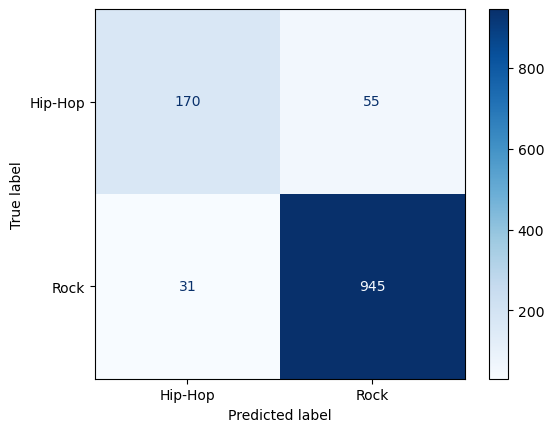

In [56]:
knn = metrics_knn[0]
ConfusionMatrixDisplay.from_estimator(knn, X_test, y_test, cmap=plt.cm.Blues)
pass

### 8.2. SVC

In [57]:
ker = ['linear', 'poly', 'rbf', 'sigmoid']
parametrs = {'kernel': ker}

svc = SVC()
grid = GridSearchCV(svc, parametrs, cv = 5)
grid.fit(X_train, y_train)
best_kernel = grid.best_params_['kernel']


metrics_svc = get_metrics(SVC(kernel = best_kernel))

balanced_accuracy_score Train:  0.8516723739148719
balanced_accuracy_score Test:  0.8485564663023679
cohen_kappa_score Train:  0.7529636928532113
cohen_kappa_score Test:  0.7566266489395879
matthews_corrcoef Train:  0.7578931409385838
matthews_corrcoef Test:  0.7637783508108263


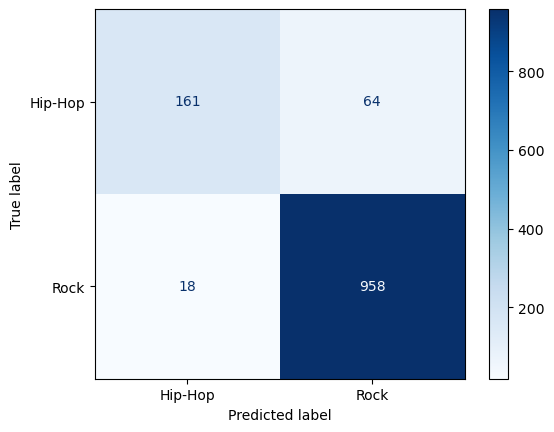

In [58]:
svc = metrics_svc[0]
ConfusionMatrixDisplay.from_estimator(svc, X_test, y_test, cmap = plt.cm.Blues)
pass

### 8.3. RandomForestClassifier

In [59]:
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range(1, 13, 2)}

rand_forest_model = RandomForestClassifier(random_state = 17)
grid = GridSearchCV(rand_forest_model, parametrs, cv = 5)
grid.fit(X_train, y_train)
n_est_best = grid.best_params_['n_estimators']
max_depth_best = grid.best_params_['max_depth']


metrics_rand_forest = get_metrics(RandomForestClassifier(random_state = 17, 
                                                         n_estimators = n_est_best, 
                                                         max_depth = max_depth_best))

balanced_accuracy_score Train:  0.8919362590489922
balanced_accuracy_score Test:  0.8514640255009107
cohen_kappa_score Train:  0.8356751659003773
cohen_kappa_score Test:  0.7559235961989085
matthews_corrcoef Train:  0.8404702155931517
matthews_corrcoef Test:  0.7614785153869348


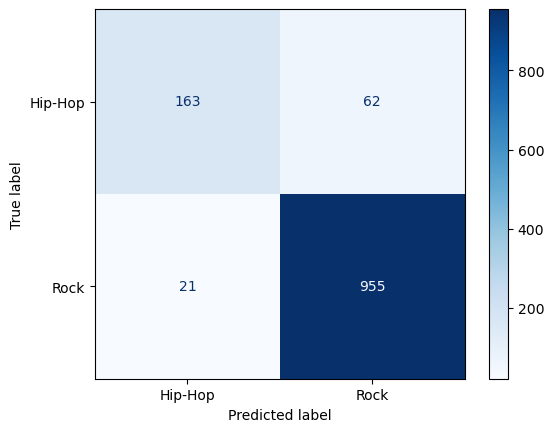

In [60]:
rand_forest = metrics_rand_forest[0]
ConfusionMatrixDisplay.from_estimator(rand_forest, X_test, y_test, cmap = plt.cm.Blues)
pass

Метод Random Forest позволяет получить некоторые оценки "важности" признаков. Чем значение больше, тем признак важнее.

In [62]:
importances = rand_forest.feature_importances_
importances

array([0.0654018 , 0.21223217, 0.06080705, 0.10451546, 0.02166741,
       0.38154417, 0.09255087, 0.06128107])

In [63]:
np.sum(importances)

1.0

In [64]:
importances = pd.Series(rand_forest.feature_importances_, index = X_train.columns).sort_values(ascending = False)
importances

speechiness         0.381544
danceability        0.212232
instrumentalness    0.104515
tempo               0.092551
acousticness        0.065402
valence             0.061281
energy              0.060807
liveness            0.021667
dtype: float64

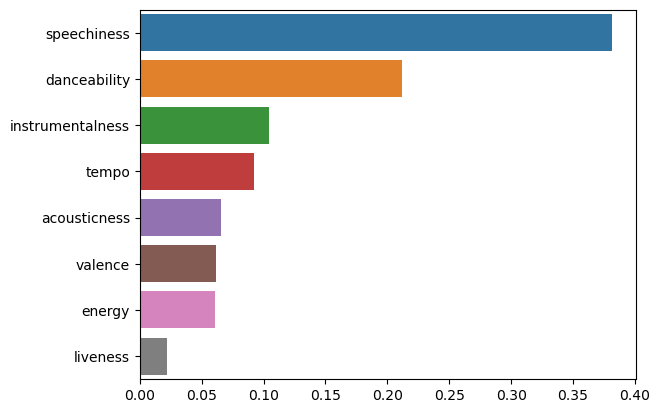

In [65]:
sns.barplot(y = importances.index, x = importances, orient = "h")
pass

Самым "важным" признаком оказался признак речевости (speechiness).  
Попробуем построить модель, описывающую зависимость жанра песни (genre_top) от количества слов в ней (speechiness). 

In [66]:
X_speechines = X_train
X_speechines = X_speechines.drop(['acousticness', 'danceability', 
                                  'energy', 'instrumentalness', 
                                  'liveness', 'tempo', 'valence'], axis = 1)

In [67]:
X_speechines_test = X_test
X_speechines_test = X_speechines_test.drop(['acousticness', 'danceability', 
                                            'energy', 'instrumentalness',
                                            'liveness', 'tempo', 'valence'], axis = 1)

In [68]:
parametrs = { 'n_estimators': range(10, 51, 10),
              'max_depth': range(1,13, 2)}

rand_forest_model = RandomForestClassifier(random_state = 17)
grid = GridSearchCV(rand_forest_model, parametrs, cv = 5)
grid.fit(X_speechines, y_train)

n_est_best = grid.best_params_['n_estimators']
max_depth_best = grid.best_params_['max_depth']

rand_forest_model = RandomForestClassifier(random_state = 17, n_estimators = n_est_best, max_depth = max_depth_best)
rand_forest_model.fit(X_speechines, y_train)

y_train_pred = rand_forest_model.predict(X_speechines)
y_test_pred = rand_forest_model.predict(X_speechines_test)
    
accuracy_train = metrics.accuracy_score(y_train, y_train_pred)
accuracy_test = metrics.accuracy_score(y_test, y_test_pred)  

print("Accuracy Train: ", accuracy_train)
print("Accuracy Test: ", accuracy_test)
print("balanced_accuracy_score Train: ", metrics.balanced_accuracy_score(y_train, y_train_pred))
print("balanced_accuracy_score Test: ", metrics.balanced_accuracy_score(y_test, y_test_pred))
print("cohen_kappa_score Train: ", metrics.cohen_kappa_score(y_train, y_train_pred))
print("cohen_kappa_score Test: ", metrics.cohen_kappa_score(y_test, y_test_pred))
print("matthews_corrcoef Train: ", metrics.matthews_corrcoef(y_train, y_train_pred))
print("matthews_corrcoef Test: ", metrics.matthews_corrcoef(y_test, y_test_pred))

Accuracy Train:  0.8747570119411274
Accuracy Test:  0.8751040799333888
balanced_accuracy_score Train:  0.7612733171127332
balanced_accuracy_score Test:  0.7658424408014572
cohen_kappa_score Train:  0.5624371056770117
cohen_kappa_score Test:  0.5645037300624175
matthews_corrcoef Train:  0.5667558671006111
matthews_corrcoef Test:  0.5672743002284878


Точность снизилась, но избавились от переобучения.

### 8.4. DecisionTreeClassifier

In [69]:
criterion_ = ['gini', 'entropy']
parametrs = {'criterion': criterion_,
             'max_depth': range (1,13, 2)}

tree_model = DecisionTreeClassifier(random_state = 17)
grid = GridSearchCV(tree_model, parametrs, cv = 5)
grid.fit(X_train, y_train)
criterion_best = grid.best_params_['criterion']
max_depth_best = grid.best_params_['max_depth']


metrics_decision_tree = get_metrics(DecisionTreeClassifier(random_state = 17, 
                                                           criterion = criterion_best, 
                                                           max_depth = max_depth_best))

balanced_accuracy_score Train:  0.8610435252771018
balanced_accuracy_score Test:  0.8431010928961749
cohen_kappa_score Train:  0.7458283918337081
cohen_kappa_score Test:  0.7030320560970034
matthews_corrcoef Train:  0.7468808526116175
matthews_corrcoef Test:  0.7035734458770838


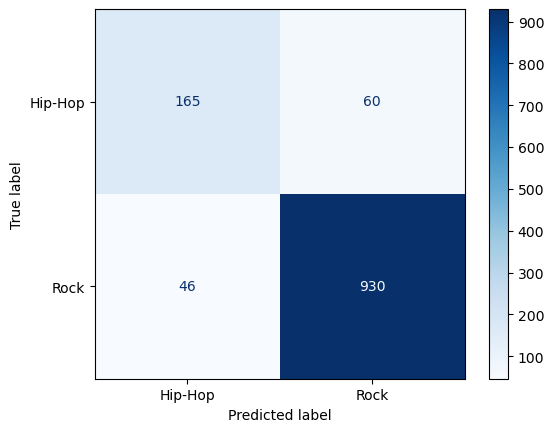

In [70]:
decision_tree = metrics_decision_tree[0]
ConfusionMatrixDisplay.from_estimator(decision_tree, X_test, y_test, cmap=plt.cm.Blues)
pass

### 8.5. GradientBoostingClassifier

In [71]:
parametrs = { 'n_estimators': range(10, 51, 10),
              'max_depth': range(1, 13, 2)}

gb_clf = GradientBoostingClassifier(random_state = 17)
grid = GridSearchCV(gb_clf, parametrs, cv = 5)
grid.fit(X_train, y_train)
n_est_best = grid.best_params_['n_estimators']
max_depth_best = grid.best_params_['max_depth']


metrics_gradient_boost = get_metrics(GradientBoostingClassifier(random_state = 17,
                                                                n_estimators = n_est_best,
                                                                max_depth = max_depth_best))

balanced_accuracy_score Train:  0.9137507134060256
balanced_accuracy_score Test:  0.8668533697632059
cohen_kappa_score Train:  0.861166265060241
cohen_kappa_score Test:  0.7637434911726436
matthews_corrcoef Train:  0.8630288964448382
matthews_corrcoef Test:  0.7653855299746114


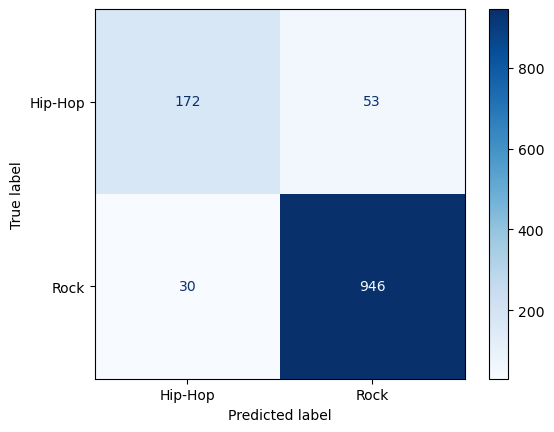

In [72]:
gb = metrics_gradient_boost[0]
ConfusionMatrixDisplay.from_estimator(gb, X_test, y_test, cmap=plt.cm.Blues)
pass

Все 5 классификаторов показали не плохие результаты, но хотелось бы увеличить точность.

### 9. Борьба с несбалансированными классами

Применим методы балансировки из библиотеки imbalanced-learn.

In [73]:
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedRandomForestClassifier

In [80]:
parametrs = {'n_estimators': range(10, 51, 10)}

rus_boost = RUSBoostClassifier(random_state = 17)
grid = GridSearchCV(rus_boost, parametrs, cv = 5)
grid.fit(X_train, y_train)
n_est_best = grid.best_params_['n_estimators']


metrics_RUS_boost = get_metrics(RUSBoostClassifier(random_state = 17, 
                                                   n_estimators = n_est_best))

balanced_accuracy_score Train:  0.89157179618115
balanced_accuracy_score Test:  0.8932081056466302
cohen_kappa_score Train:  0.7134207228849725
cohen_kappa_score Test:  0.7143486470779241
matthews_corrcoef Train:  0.7209027813262037
matthews_corrcoef Test:  0.7221456300939287


In [81]:
parametrs = {'n_estimators': range(10, 51, 10)}

easy_ens = EasyEnsembleClassifier(random_state = 17)
grid = GridSearchCV(easy_ens, parametrs, cv = 5)
grid.fit(X_train, y_train)
n_est_best = grid.best_params_['n_estimators']


metrics_easy_ensemble = get_metrics(EasyEnsembleClassifier(random_state = 17, 
                                                   n_estimators = n_est_best))

balanced_accuracy_score Train:  0.9073313107646712
balanced_accuracy_score Test:  0.9147518214936248
cohen_kappa_score Train:  0.7313437799716138
cohen_kappa_score Test:  0.7285908273687032
matthews_corrcoef Train:  0.7415170013453417
matthews_corrcoef Test:  0.7427834774329398


In [82]:
parametrs = {'n_estimators': range(10, 51, 10)}

balanc_rand_forest = BalancedRandomForestClassifier(random_state = 17)
grid = GridSearchCV(balanc_rand_forest, parametrs, cv = 5)
grid.fit(X_train, y_train)
n_est_best = grid.best_params_['n_estimators']


metrics_ballanced_rand_forest = get_metrics(BalancedRandomForestClassifier(random_state = 17, 
                                                   n_estimators = n_est_best))

balanced_accuracy_score Train:  0.9598765432098766
balanced_accuracy_score Test:  0.9120173041894353
cohen_kappa_score Train:  0.8134516603372081
cohen_kappa_score Test:  0.7237871251982377
matthews_corrcoef Train:  0.8279863115398841
matthews_corrcoef Test:  0.7378862011172104


Благодаря методам балансировки, мы получили результаты лучше, чем они были.

### Вывод

В результате проделанной работы было выполнено следующее:  
* Загрузка данных.
* Разбиение данных на обучающую и тестовую выборки.
* Визуализация данных из обучающей выборки. В частности, построены диаграммы рассеивания для количественных признаков, гистограммы распределений, boxplot. Вычислены основные характеристики. Интерпретированы результаты.
* Обработаны пропущенные значения, а именно показано, что их нет.
* Обработаны коррелированные признаки: сильной корреляции между признаками не наблюдалось.
* Обработаны категориальные признаки.
* Проведено масштабирование.
* Запущены следующие классификаторы: KNN, SVC, Random Forest, Деревья решений, Градиентный бустинг. Для каждого из них были подобраны гиперпараметры и вычислены метрики качества.
* Выяснено, что классы несбалансированы, поэтому были применены методы балансировки из библиотеки imbalanced-learn.


Полученные результаты классификаторов показаны в таблице ниже.

In [83]:
name_models = ['KNeighbors', 'SVC', 'RandomForest', 'DecisionTree', 'GradientBoosting',
               'RUSBoost', 'EasyEnsemble', 'BalancedRandomForest']

Metrics = pd.DataFrame({'KNeighbors': metrics_knn[1:], 'SVC' : metrics_svc[1:], 
                        'RandomForest' : metrics_rand_forest[1:], 'DecisionTree' : metrics_decision_tree[1:],  
                        'GradientBoosting' : metrics_gradient_boost[1:], 'RUSBoost' : metrics_RUS_boost[1:], 
                        'EasyEnsemble' : metrics_easy_ensemble[1:], 'BalancedRandomForest' : metrics_ballanced_rand_forest[1:]}, 
                       index = ['balanced_acc_train', 'balanced_acc_test', 
                                'cohen_kappa_score_train', 'cohen_kappa_score_test',
                                'matthews_corrcoef_train', 'matthews_corrcoef_test'])

In [84]:
Metrics

KNeighbors       SVC  RandomForest  DecisionTree  \
balanced_acc_train         0.845068  0.851672      0.891936      0.861044   
balanced_acc_test          0.861897  0.848556      0.851464      0.843101   
cohen_kappa_score_train    0.726660  0.752964      0.835675      0.745828   
cohen_kappa_score_test     0.754768  0.756627      0.755924      0.703032   
matthews_corrcoef_train    0.729325  0.757893      0.840470      0.746881   
matthews_corrcoef_test     0.756541  0.763778      0.761479      0.703573   

                         GradientBoosting  RUSBoost  EasyEnsemble  \
balanced_acc_train               0.913751  0.891572      0.907331   
balanced_acc_test                0.866853  0.893208      0.914752   
cohen_kappa_score_train          0.861166  0.713421      0.731344   
cohen_kappa_score_test           0.763743  0.714349      0.728591   
matthews_corrcoef_train          0.863029  0.720903      0.741517   
matthews_corrcoef_test           0.765386  0.722146      0.742783   

                         BalancedRandomForest  
balanced_acc_train                   0.959877  
balanced_acc_test                    0.912017  
cohen_kappa_score_train              0.813452  
cohen_kappa_score_test               0.723787  
matthews_corrcoef_train              0.827986  
matthews_corrcoef_test               0.737886

В итоге самый лучший из всех классификаторов оказался EasyEnsemble. 
Получена точность 91%.